In [37]:
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,MinMaxScaler



Pandas is a versatile tool for data processing. 

In [20]:

data = {
    "John": {
        "blood_pressure": 120,
        "blood_oxygen": 98
    },
    "Jane ": {
        "blood_pressure": 130,
        "blood_oxygen": 95
    },
    "Mike": {
        "blood_pressure": 140,
        "blood_oxygen": 96
    }
}

First we can convert the dictionary into a pandas dataframe. The benefit of doing so is that we can easily visualize the data and manipulate it with pandas methods. 

In [21]:
patient_df = pd.DataFrame(data)
print(patient_df)

                John  Jane   Mike
blood_pressure   120    130   140
blood_oxygen      98     95    96


Suppose we prefer to have patient names in columns instead of in rows, we can transpose the dataframe.

In [22]:
patient_df = pd.DataFrame(data).T
print(patient_df)

       blood_pressure  blood_oxygen
John              120            98
Jane              130            95
Mike              140            96


We might want to hide the patient names when we publicize the data. Pandas allow us to change index easily

In [23]:
patient_df.index = ['P1', 'P2', 'P3']
print(patient_df.index)
print('====================')
patient_df

Index(['P1', 'P2', 'P3'], dtype='object')


,blood_pressure,blood_oxygen
P1,120,98
P2,130,95
P3,140,96


To access a row, we can call the name of the row

In [24]:
print(patient_df.loc['P2'])

blood_pressure    130
blood_oxygen       95
Name: P2, dtype: int64


To access columns of the dataframe, there are more than one method. 

In [25]:
print(patient_df['blood_pressure'])
print('====================')
print(patient_df.blood_pressure)


P1    120
P2    130
P3    140
Name: blood_pressure, dtype: int64
P1    120
P2    130
P3    140
Name: blood_pressure, dtype: int64


We can also access locations of dataframes numerically. 

In [26]:
print(patient_df.iloc[0])
print('====================')
print(patient_df.iloc[0,1])
print('====================')
print(patient_df.iloc[:,1])


blood_pressure    120
blood_oxygen       98
Name: P1, dtype: int64
98
P1    98
P2    95
P3    96
Name: blood_oxygen, dtype: int64


Now we can store the data into a csv file for later usage. 

In [27]:
patient_df.to_csv("Patient_info.csv")

You might be wondering how to retrieve the information in csv files. 

In [28]:
data = pd.read_csv("Iris.csv")
print(data.head())
print('====================')
print(data.tail(10))
print('====================')
print(data.shape)


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
140  141            6.7           3.1            5.6           2.4   
141  142            6.9           3.1            5.1           2.3   
142  143            5.8           2.7            5.1           1.9   
143  144            6.8           3.2            5.9           2.3   
144  145            6.7           3.3            5.7           2.5   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5           

Some useful tricks to have a general idea of the dataset. 

In [29]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [30]:
data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

We can select part of the dataset based on column values

In [31]:
print(data['Species']=='Iris-setosa')
print('====================')
print(data[data['Species']=='Iris-setosa'])


0       True
1       True
2       True
3       True
4       True
       ...  
145    False
146    False
147    False
148    False
149    False
Name: Species, Length: 150, dtype: bool
    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0    1            5.1           3.5            1.4           0.2  Iris-setosa
1    2            4.9           3.0            1.4           0.2  Iris-setosa
2    3            4.7           3.2            1.3           0.2  Iris-setosa
3    4            4.6           3.1            1.5           0.2  Iris-setosa
4    5            5.0           3.6            1.4           0.2  Iris-setosa
5    6            5.4           3.9            1.7           0.4  Iris-setosa
6    7            4.6           3.4            1.4           0.3  Iris-setosa
7    8            5.0           3.4            1.5           0.2  Iris-setosa
8    9            4.4           2.9            1.4           0.2  Iris-setosa
9   10            4.9           3.1  

We can rename columns

In [32]:
#Renaming one column
data.rename(columns={'SepalLengthCm':'Sepal_Length'})


,Id,Sepal_Length,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


We can group the data and do operations on each group. 

In [33]:
# Group the data by 'Species'
grouped_data = data.groupby('Species')

# Iterate over the groups and print their names and mean values
for name, group in grouped_data:
    print("Group Name:", name)
    
    # Select the numeric columns and compute their mean
    group = group.select_dtypes(include=['float64'])
    group_mean = group.mean()
    
    # Print the mean values
    print("Group Mean:")
    print(group_mean)
    print("------------------")

Group Name: Iris-setosa
Group Mean:
SepalLengthCm    5.006
SepalWidthCm     3.418
PetalLengthCm    1.464
PetalWidthCm     0.244
dtype: float64
------------------
Group Name: Iris-versicolor
Group Mean:
SepalLengthCm    5.936
SepalWidthCm     2.770
PetalLengthCm    4.260
PetalWidthCm     1.326
dtype: float64
------------------
Group Name: Iris-virginica
Group Mean:
SepalLengthCm    6.588
SepalWidthCm     2.974
PetalLengthCm    5.552
PetalWidthCm     2.026
dtype: float64
------------------


How do we use the pandas dataset for machine learning tasks? 

In [34]:
# Load the Iris dataset using pandas
data = pd.read_csv("Iris.csv")
X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
y = data['Species'].values

# Encode the target labels as numeric values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the data into PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

In [35]:
# Define the neural network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(4, 16)
        self.fc2 = nn.Linear(16, 16)
        self.fc3 = nn.Linear(16, 3)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the network
model = Net()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 100
batch_size = 64

for epoch in range(num_epochs):
    running_loss = 0.0
    for i in range(0, len(X_train), batch_size):
        inputs = X_train[i:i+batch_size]
        targets = y_train[i:i+batch_size]
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(X_train)}')

Epoch 1/100, Loss: 0.017744908730189007
Epoch 2/100, Loss: 0.017633481820424398
Epoch 3/100, Loss: 0.017546588182449342
Epoch 4/100, Loss: 0.017469627658526103
Epoch 5/100, Loss: 0.01739847461382548
Epoch 6/100, Loss: 0.01733105182647705
Epoch 7/100, Loss: 0.017264828085899353
Epoch 8/100, Loss: 0.01719870964686076
Epoch 9/100, Loss: 0.01713195045789083
Epoch 10/100, Loss: 0.017064303159713745
Epoch 11/100, Loss: 0.01699566642443339
Epoch 12/100, Loss: 0.016925978660583495
Epoch 13/100, Loss: 0.01685516784588496
Epoch 14/100, Loss: 0.016783150533835094
Epoch 15/100, Loss: 0.01670976181825002
Epoch 16/100, Loss: 0.016634794572989147
Epoch 17/100, Loss: 0.01655813753604889
Epoch 18/100, Loss: 0.01647979865471522
Epoch 19/100, Loss: 0.01639953553676605
Epoch 20/100, Loss: 0.016317276656627654
Epoch 21/100, Loss: 0.016232862571875253
Epoch 22/100, Loss: 0.016146304706732433
Epoch 23/100, Loss: 0.016057360668977103
Epoch 24/100, Loss: 0.015965948502222698
Epoch 25/100, Loss: 0.0158721104264

In [18]:
# Evaluation
model.eval()
with torch.no_grad():
    outputs = model(X_test)
    _, predicted = torch.max(outputs, 1)
    accuracy = (predicted == y_test).sum().item() / len(y_test)
    print(f'Test Accuracy: {accuracy}')

Test Accuracy: 0.9666666666666667


Last topic I want to touch on is normalization. Machine learning algorithms perform better when the data in each axis is from 0 to 1. 

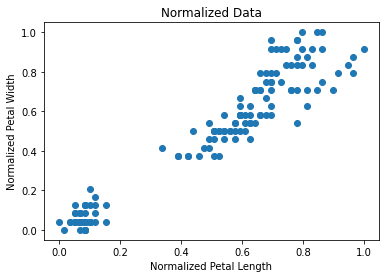

In [39]:
features = data[['PetalLengthCm', 'PetalWidthCm']]

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(features)
normalized_df = pd.DataFrame(normalized_data, columns=['PetalLengthCm', 'PetalWidthCm'])


plt.scatter(normalized_df['PetalLengthCm'], normalized_df['PetalWidthCm'])
plt.xlabel('Normalized Petal Length')
plt.ylabel('Normalized Petal Width')
plt.title('Normalized Data')
plt.show()


The challenge for you is to find out how to convert the transformed data back to their original scale. 

No homework for this class. Good luck with your research and let me know if you have any questions! 